### Шмидт Ян, 304 гр., 2023, Вариант 9

Из условия: $$\xi = \dfrac{1}{11}, \quad A = \dfrac{1}{15}, \quad B = \dfrac{1}{25}$$
Система ОДУ:
$$\dfrac{dy_1(x)}{dx}=Ay_2(x)\\ \dfrac{dy_2(x)}{dx}=-By_1(x)$$
Начальные данные: $$x_0 = 0\\ y_1(x_0)=B\pi\\ y_2(x_0)=A\pi$$
Такой вопрос: $$x_k = \pi\\ y_1(x_k) = ?\\ y_2(x_k) = ?$$

<!-- Поскольку все уравнения системы можно считать равноправными, то запишем так:

Для первого уравнения:
$$\dfrac{dy_1(x)}{dx}=Ay_2(x)\\ y_1(x_0)=B\pi\\ y_1(x_k) = ?$$
Для второго уравнения:
$$\dfrac{dy_2(x)}{dx}=-By_1(x)\\ y_2(x_0)=A\pi\\ y_2(x_k) = ?$$ -->

# Часть 1. Расчетные схемы метода Рунге-Кутты с постоянным шагом

### Справочная информация: что такое явный метод Рунге-Кутты (ЯМРК)?

![image](./images/ЯМРК.png)
где $b_i, c_i, a_{ij}$ — заданные вещественные постоянные

### Что такое порядок ЯМРК?

![image](./images/порядокЯМРК.png)

### Определение локальной (методической) погрешности. Как производится выбор $b_i, c_i, a_{ij}$?

![image](./images/ЯМРК-теория2.png)

### Обобщение метода Рунге-Кутты на случай систем ОДУ

![image](./images/ODEsystem.png)

## Часть 1.1. Построить 2х-этапного ЯМРК 2-го порядка при значении параметра $c=\xi$ (параметр $\xi$ указан в варианте).

In [141]:
import numpy as np
import matplotlib.pyplot as plt

### Посчитаем необходимые величины и коэффициенты

In [142]:
xi, A, B = 1/11, 1/15, 1/25

x0 = 0
pi = np.pi
xk = pi

N = 4
nodes = np.linspace(x0, xk, N)
h = (xk - x0) / len(nodes)
print(f'Число узлов разбиения: {N}, \nвеличина постоянного шага h: {h}')

c2 = xi
a21 = c2
b1 = 1 - 1/(2*c2)
b2 = 1/(2*c2)
print(f'\nДля двухэтапного метода Рунге-Кутты: \nc2 = {c2}, \na21 = {a21}, \nb1 = {b1}, \nb2 = {b2}')

Число узлов разбиения: 4, 
величина постоянного шага h: 0.7853981633974483

Для двухэтапного метода Рунге-Кутты: 
c2 = 0.09090909090909091, 
a21 = 0.09090909090909091, 
b1 = -4.5, 
b2 = 5.5


### Точное решение задачи Коши через Maple

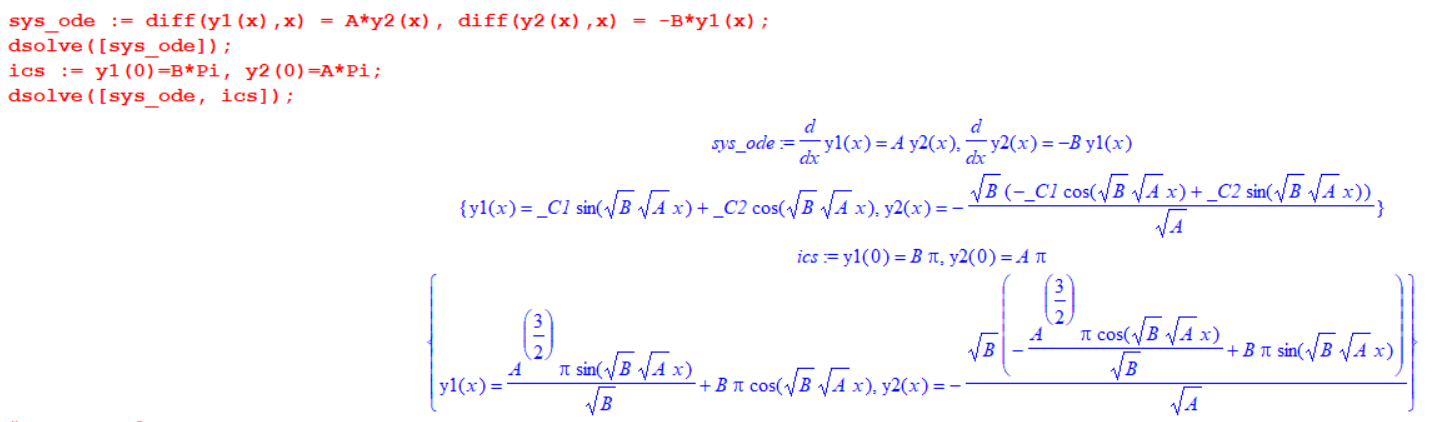

In [143]:
def y1(x):
    srt = np.sqrt(A*B)
    return ((A**(3/2))*pi*np.sin(srt*x)) / np.sqrt(B) + B*pi*np.cos(srt*x)

def y2(x):
    srt = np.sqrt(A*B)
    return (-1)*(np.sqrt(B/A))*(-(A**(3/2))*pi*np.cos(srt*x) / np.sqrt(B) + B*pi*np.sin(srt*x))

### Графики решений

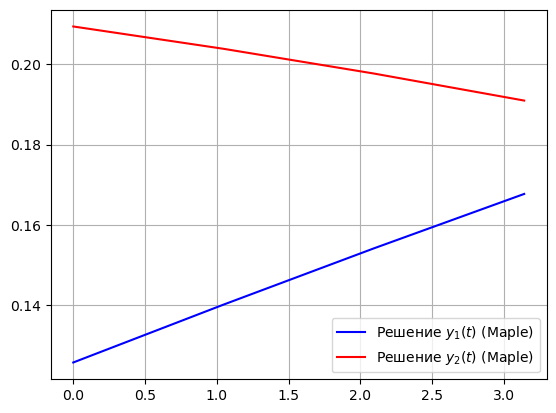

In [161]:
plt.plot(nodes, y1(nodes), color='b', label='Решение $y_1(t)$ (Maple)')
plt.plot(nodes, y2(nodes), color='r', label='Решение $y_2(t)$ (Maple)')
plt.grid()

plt.legend()
plt.show()

$y_i(x_k) = y_i(\pi) = ? \quad (i=\overline{1,2})$

In [145]:
print(f'Точное решение поставленной задачи Коши: \ny_1(x_k) = {y1(pi)}, \ny_2(x_k) = {y2(pi)}')

Точное решение поставленной задачи Коши: 
y_1(x_k) = 0.16768641025029876, 
y_2(x_k) = 0.19096724683765257


### Точное решение задачи Коши через scipy

In [146]:
from scipy.integrate import odeint  # for comparison

Система ОДУ:
$$y'_1(x)=Ay_2(x)\\ y'_2(x)=-By_1(x)$$
Начальные данные: $$x_0 = 0\\ y_1(x_0)=B\pi\\ y_2(x_0)=A\pi$$

В векторном виде:
Если $y=[y_1(x), y_2(x)]$, то получим уравнение $y'=f(t, y)$, где $f(t,y)=[Ay[1], -By[0]]$

In [147]:
def SODE(y, t, A, B):
    return np.array([A*y[1], -B*y[0]])

In [148]:
y0 = np.array([B*pi, A*pi])

$\texttt{odeint}$ посчитает СОДУ на $t\in[0,\pi]$ с $N$ разбиениями

In [149]:
t = np.linspace(0, pi, N)
sol = odeint(SODE, y0, t, args=(A, B))

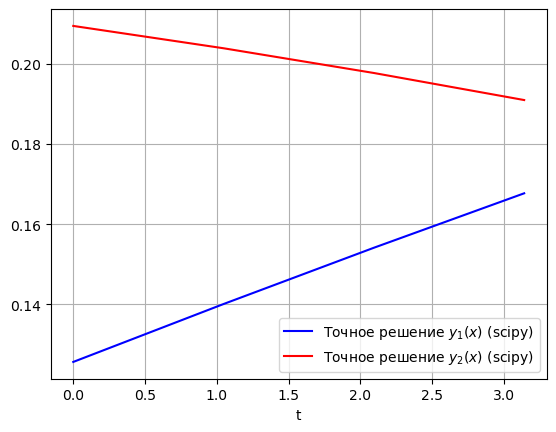

In [162]:
plt.plot(t, sol[:, 0], color='b', label=r'Точное решение $y_1(x)$ (scipy)')
plt.plot(t, sol[:, 1], color='r', label=r'Точное решение $y_2(x)$ (scipy)')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

### Для понимания разберу ЯМРК 1 порядка (Метод Эйлера)

Аппроксимируем по правилу $$y_{n+1}=y_n + hf(y_n,t_n),$$ $h=t_{n+1}-t_n$

In [151]:
def rungekutta1(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n - 1):
        y[i+1] = y[i] + (t[i+1] - t[i])*f(y[i], t[i], *args)
        
    return y

In [152]:
sol = rungekutta1(SODE, y0, t, args=(A, B))

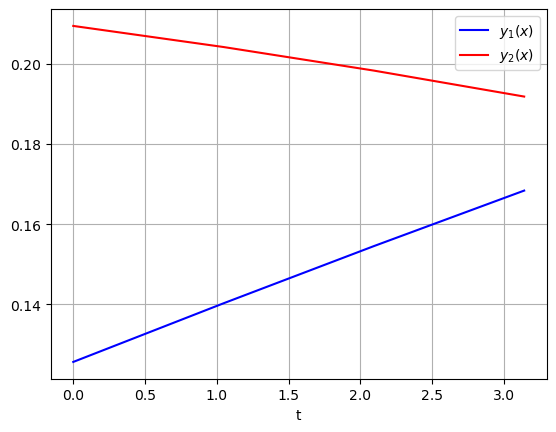

In [153]:
plt.plot(t, sol[:, 0], 'b', label=r'$y_1(x)$')
plt.plot(t, sol[:, 1], 'r', label=r'$y_2(x)$')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

С тем же кол-м точек метод Эйлера менее точен, чем выше использованный метод из $\texttt{scipy}$. При увеличении числа точек можно достаточно точно приблизиться к истинному решению

In [154]:
t2 = np.linspace(0, pi, N*10)
sol2 = rungekutta1(SODE, y0, t2, args=(A, B))

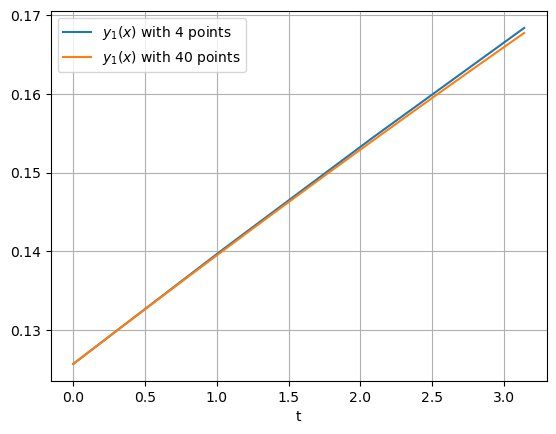

In [155]:
plt.plot(t, sol[:, 0], label=r'$y_1(x)$ with {} points'.format(N))
plt.plot(t2, sol2[:, 0], label=r'$y_1(x)$ with {} points'.format(10*N))

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## 2х-этапный ЯМРК 2 порядка

![image](./images/двухэтапЯМРК.png)

In [156]:
def rungekutta2(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        y[i+1] = y[i] + h*f(y[i] + f(y[i], t[i], *args)*h/2., t[i] + h/2., *args)
    return y

For our simple ODE example, this method is already quite efficient.

In [157]:
t4 = np.linspace(0, pi, 10)
sol4 = rungekutta2(SODE, y0, t4, args=(A, B))

In [158]:
t = np.linspace(0, pi, N)
sol = rungekutta2(SODE, y0, t, args=(A, B))

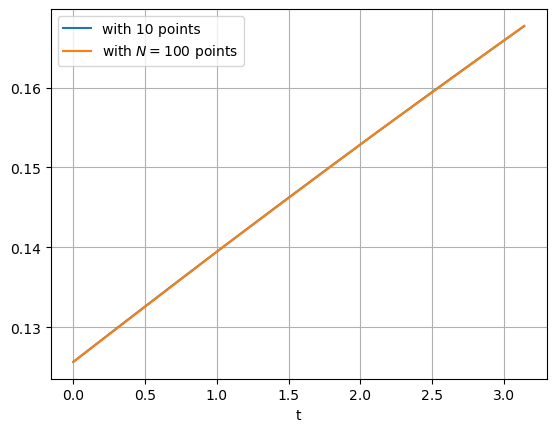

In [159]:
plt.plot(t4, sol4[:, 0], label='with 10 points')
plt.plot(t, sol[:, 0], label='with $N=100$ points')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Часть 1.2. Решение задачи Коши с заданной точностью ($\varepsilon = 10e^{-4}$) с постоянным шагом интегрирования и оценкой полной погрешности по методу Рунге. Начальный шаг выбирать согласно алгоритму выбора начального шага (стр. 15 методического пособия).

# Часть 2. Расчетные схемы метода Рунге-Кутты с автоматическим выбором шага

## Часть 2.1. Решение задачи Коши на базе построенной в части  1.1 схемы 2х-этапного ЯМРК 2-го порядка с автоматическим выбором шага с заданной максимально допустимой локальной погрешностью ($\rho=10e^{-5}$) и оценкой локальной погрешности по методу Рунге. Начальный шаг выбирать так же, как и в части 1.2.

# Часть 3. Анализ эффективности методов Рунге-Кутты

## Часть 3.1. Решение задачи Коши с постоянным и автоматическим выбором шага на базе одной из классических расчетных схем интегрирования 3-го или 4-го порядка точности.

### 4х-этапный метод Рунге-Кутты 4-го порядка — классический метод Рунге-Кутты, или правило одной шестой
![image](./images/КлассичМетодРК.png)

Я решил реализовать именно этот метод

In [85]:
def rungekutta4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1*h/2., t[i] + h/2., *args)
        k3 = f(y[i] + k2*h/2., t[i] + h/2., *args)
        k4 = f(y[i] + k3*h, t[i] + h, *args)
        y[i+1] = y[i] + (h/6.)*(k1 + 2*k2 + 2*k3 + k4)
    return y

In [86]:
t4 = np.linspace(0, pi, N)
sol4 = rungekutta4(SODE, y0, t4, args=(A, B))

In [87]:
t = np.linspace(0, pi, N*10)
sol = rungekutta4(SODE, y0, t, args=(A, B))

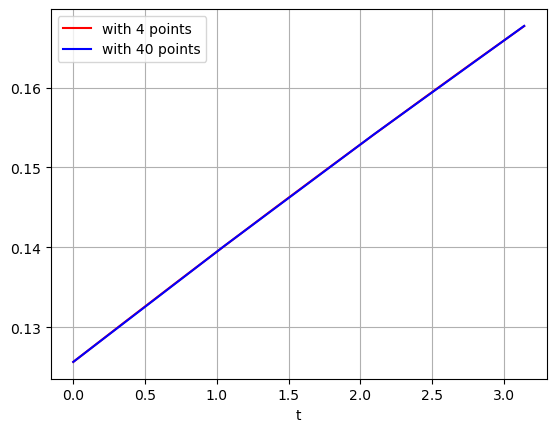

In [168]:
plt.plot(t4, sol4[:, 0], color='r', label=f'with {N} points')
plt.plot(t, sol[:, 0], color='b', label=f'with {N*10} points')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

## Часть 3.2. Для выбранного метода (схемы оппонента) из части 3.1 и реализованного Вами в части 1.2 2х-этапного ЯМРК 2-го порядка для решения задачи Коши с постоянным шагом определите величину шага интегрирования $h$, обеспечивающего вычисление приближенного решения с заданной точностью ($\varepsilon = 10^{-4}$). Постройте графики зависимости истинной полной погрешности от значения независимой переменной $x$ при интегрировании с полученным шагом $h$.

## Часть 3.3. Для схемы оппонента из части 3.1 и реализованного Вами в части 2.1 2х этапного ЯМРК 2-го порядка для решения задачи Коши с автоматическим выбором шага интегрирования постройте:

### Часть 3.3.1 графики зависимости величины шага интегрирования от значения независимой переменной $x$

### Часть 3.3.2 графики зависимости отношения истинной локальной погрешности к полученной оценке локальной погрешности от значения независимой переменной $x$ (см. формулу (91) в методичке).

### Формула (91): $$\delta_{j+1}^\varepsilon = \dfrac{l_{j+1}}{h_{j \varepsilon}}$$

### Часть 3.3.3 графики зависимости количества вычислений правой части системы от заданной точности $\varepsilon$ (например, $\varepsilon = [10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}, 10^{-5}]$).